(784, 59999)
(59999, 785)
Validation accuracy: 0.098010
Validation accuracy: 0.098210
Validation accuracy: 0.100910
Validation accuracy: 0.100910


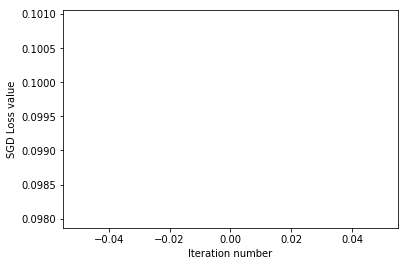

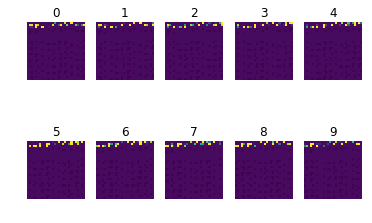

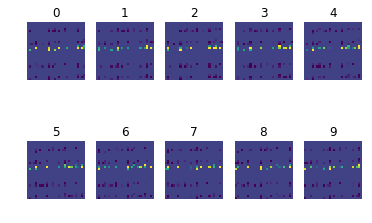

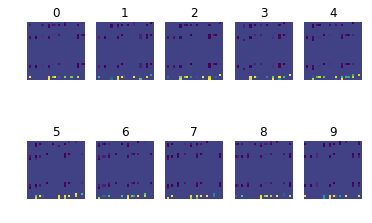

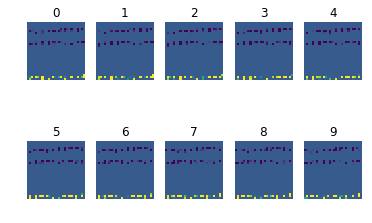

In [244]:
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

MNIST_train_df = pd.read_csv('mnist_train.csv', sep=',')
X_tr = MNIST_train_df.iloc[:,1:].transpose()
Y_tr = MNIST_train_df.iloc[:, 0]
print X_tr.shape

MNIST_test_df = pd.read_csv('mnist_test.csv', sep=',')
X_test = MNIST_test_df.iloc[:,1:].transpose()
Y_test = MNIST_test_df.iloc[:, 0]
print MNIST_train_df.shape

def train(X, y, X_test, Y_test, batch_size, reg, num_iters):

    dim, num_train = X.shape
    num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
    
    W = np.random.randn(num_classes, dim) * 0.001

    accuracy = []
    iteration = []

    for i in xrange(num_iters):
        idxs = np.random.choice(num_train, batch_size, replace=False)
        grad = sub_grad(W,X.iloc[:, idxs], y.iloc[idxs], reg) # grad =[K x D]   
        # update weights
        learning_rate = 1/(i+1)
        #print learning_rate * grad
        W = W - learning_rate * grad # [K x D]
        W = proximal_operator(W,reg)
        if (i % 1000 == 0):
            # print 'iteration %d/%d: loss %f' % (i, num_iters, loss)
            y_test_pred_sgd = predict(W, X_test)[0]
            print 'Validation accuracy: %f' % (np.mean(Y_test == y_test_pred_sgd))
            accuracy.append((np.mean(Y_test == y_test_pred_sgd)))
            iteration.append(i)

    return W, accuracy, iteration 

def sub_grad(W, X, y, reg):
    
    #print "calculating loss:"
    #print W.shape
    # print X.shape
    dW = np.zeros(W.shape)
    loss = 0.0
    delta = 1.0

    num_train = y.shape[0]
    scores_mat = W.dot(X)
    #print scores_mat
    correct_class_score = scores_mat[y, xrange(num_train)] 
    margins_mat = scores_mat - correct_class_score + delta
    margins_mat = np.maximum(0, margins_mat)
    margins_mat[y, xrange(num_train)] = 0

    scores_mat_grad = margins_mat
    num_pos = np.sum(margins_mat, axis=0)
    scores_mat_grad[margins_mat > 0] = 1
    scores_mat_grad[y, xrange(num_train)] = -1 * num_pos
    dW = scores_mat_grad.dot(X.T) / num_train
    return dW

def proximal_operator(W, Lambda):
    l2_norm = np.sqrt(np.sum(np.square(W)))
    term = 1 - (Lambda/(np.maximum(l2_norm, Lambda)))
    W_hat = np.multiply(W,term)
    return W_hat

def predict(W, X):
    pred_ys = np.zeros(X.shape[1])
    f_x_mat = W.dot(X)
    pred_ys = np.argmax(f_x_mat, axis=0)
    # normalized score
    h_x_mat = 1.0 / (1.0 + np.exp(-f_x_mat)) # [1, N]
    h_x_mat = h_x_mat.squeeze()
    return pred_ys, h_x_mat


lamb = [10,1,0.1,0.01]
compress=[]
for _lambda in lamb:
  W, accuracy, iteration = train(X_tr, Y_tr, X_test, Y_test, batch_size=1, reg = 1, num_iters=1000)

  plt.plot(xrange(len(accuracy)), accuracy) 
  plt.xlabel('Iteration number')
  plt.ylabel('SGD Loss value')
  compress.append(W)

plt.show()

for w in compress: 
  w = w.reshape(28, 28, 1, 10)
  w_min, w_max = np.min(w), np.max(w)
  classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      # Rescale the weights to be between 0 and 255
      wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
      plt.imshow(wimg.astype('uint8'))
      plt.axis('off')
      plt.title(classes[i])
  plt.show()




0.11351135113511351
0.11351135113511351
0.09820982098209821
0.09820982098209821


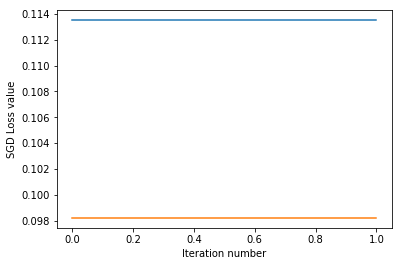

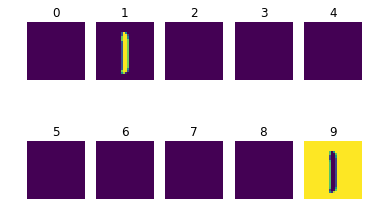

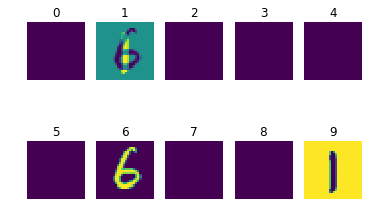

In [245]:
gradient_matrix = np.zeros((784,10))
thetha = np.random.rand(784,10)
grad_temp = np.zeros((784,10))

data = pd.read_csv('mnist_train.csv')
data2 = pd.read_csv('mnist_test.csv')
X_train = np.asarray(data.iloc[0:60000, 1:data.shape[1]])
y_train = np.asarray(data.iloc[0:60000, 0:1])
X_test = np.asarray(data2.iloc[0:data2.shape[0], 1:data2.shape[1]])
Y_test = np.asarray(data2.iloc[0:data2.shape[0], 0:1])

loss = 0

def objective(x_i, thetha_C, thetha_yi):
  svm_result = np.dot(x_i,thetha_C) - np.dot(x_i,thetha_yi) + 1
  return svm_result


def findMaxThetha(x_i, thetha, y_i):
  listOfThethas = [0]*10
  for i in range(0,10):
    if y_i != i:
      listOfThethas[i] = objective(x_i, thetha[:,i], thetha[:,y_i])
  maxThetha = max(listOfThethas)
  index_of_maxThetha = listOfThethas.index(maxThetha)
  return index_of_maxThetha

def delta_thetha(proximal_arg,gamma, _lambda):
  proximal_output = []

  for image in proximal_arg:
    norm = np.linalg.norm(image)
    if norm >  _lambda * gamma:
      temp = 1 - (_lambda * gamma / norm)
      if temp > 0:
        proximal_output.append(temp * image)
      else:
        proximal_output.append([0]*10)
    else:
        proximal_output.append([0]*10)
  return proximal_output




from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def prediction(Xtest, yTest, newThetha):
  y_pred = []
  for index in range(len(X_test)):
      result = findMaxThetha(XTest[index], newThetha, yTest[index])
      y_pred.append(result)
  print(accuracy_score(yTest,y_pred))  


max_iterations = 2000
lamb = [10,1]
compress=[]
for _lambda in lamb:
  predict_count=[]
  accu=[]
  for count in range(1,max_iterations+1):
    rand = np.random.choice(range(0,60000))
    gamma = 1/count
    x_i = X_train[rand]
    y_i = y_train[rand]  
    index_of_MaxThetha = findMaxThetha(x_i, thetha, y_i)

    gradient_matrix = np.zeros((784,10))
  
    if index_of_MaxThetha != y_i:
      gradient_matrix[:,index_of_MaxThetha] += (x_i.reshape(784))
      gradient_matrix[:,y_i] -= (x_i.reshape(784,1))

    prox_arg = thetha - gamma * gradient_matrix

    newThetha = delta_thetha(prox_arg, gamma , _lambda)
    newThetha = np.asarray(newThetha)
    thetha = newThetha
    if count%1000 == 0:
        y_pred = []  
        for index in range(len(X_test)):
            result = findMaxThetha(X_test[index], newThetha, Y_test[index])
            y_pred.append(result)
        accuracy=accuracy_score(Y_test,y_pred)
        predict_count.append([count,accuracy])
        print(accuracy_score(Y_test,y_pred))
        accu.append(accuracy_score(Y_test,y_pred))
  plt.plot(xrange(len(accu)), accu) 
  plt.xlabel('Iteration number')
  plt.ylabel('SGD Loss value')
  compress.append(thetha)

plt.show()

for w in compress: 
  w = w.reshape(28, 28, 1, 10)
  w_min, w_max = np.min(w), np.max(w)
  classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      # Rescale the weights to be between 0 and 255
      wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
      plt.imshow(wimg.astype('uint8'))
      plt.axis('off')
      plt.title(classes[i])
  plt.show()